---
title: "Dimensionality Reduction"
format:
  html:
    code-fold: true
---

For dimensionality reduction, I aim to look at the most important features in my Apple Music dataset. I will be using Principal Component Analysis and T- distributed Stochastic Neighbor Embedding to achieve this. The libraries I will be using include request, json, re, pandas, numpy, seaborn, and matplotlib,pyplot. For the techniques specifically, I will be using decomposition from Sci- Kit Learn for the Principal Component Analysis and manifold from Sci- Kit Learn for the T- distributed Stochastic Neighbor Embedding.

### PCA 

In [1]:
import requests
import json
import re
#import pycountry
import pandas as pd
import numpy as np

appledf = pd.read_csv("../websitedata/apple_py.csv")

newAppledf = pd.read_csv("../websitedata/newApple_py.csv")

In [2]:
y = appledf["Peak"]
y=np.array(y)

x= newAppledf.drop(columns={"Peak", "Unnamed: 0"})
print(x.head)

<bound method NDFrame.head of      Chart Position  Position Duration  (x?)  Points  Country Rank
0                 1                 68    45   16920            29
1                 2                 27     9   14619            44
2                 3                  6     1   13364             1
3                 4                  6     2   12624             2
4                 5                  6     2   12359             3
..              ...                ...   ...     ...           ...
831               7                245    13   10731            28
832              30                 90    10    5425           166
833              33                356    50    5108           146
834              62                412    13    2739           116
835              70                307     3    2487           104

[836 rows x 5 columns]>


In [3]:
# LOAD DATA
X= x
Y= y

#NORMALIZE AND RESHAPE
X=X/np.max(X) #NORMALIZE
# X=X.reshape(60000,28*28); #print(X[0])
cov_X = X.cov()
print(cov_X)

                   Chart Position  Position Duration          (x?)    Points  \
Chart Position       8.667260e-06           0.000040 -3.608966e-07 -0.000697   
Position Duration    3.996314e-05           0.000639  1.775432e-05 -0.004122   
(x?)                -3.608966e-07           0.000018  7.882437e-06 -0.000151   
Points              -6.968281e-04          -0.004122 -1.509267e-04  0.090143   
Country Rank         4.868267e-06           0.000026  1.687945e-07 -0.000486   

                   Country Rank  
Chart Position     4.868267e-06  
Position Duration  2.598144e-05  
(x?)               1.687945e-07  
Points            -4.861844e-04  
Country Rank       9.751437e-06  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


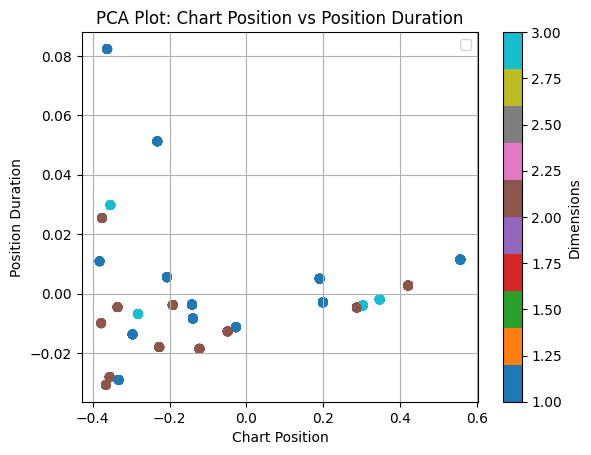

In [4]:
# APPLYING PCA TO WHOLE DATASET

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components = X.shape[1]
pca = PCA(n_components=n_components)
# pca.fit(X)
X1=pca.fit_transform(X)

#2D PLOT; for Chart Position and Position Duration
ax = plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='tab10')
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Position Duration")
plt.colorbar(ax, label="Dimensions")
plt.legend()  
plt.grid(True)
plt.show()

In [5]:
#COMPUTE PRINCIPAL COMPONENTS use min instead of mle due to it being a small dataset
n_components = min(X.shape[0], X.shape[1])

print(n_components)

5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


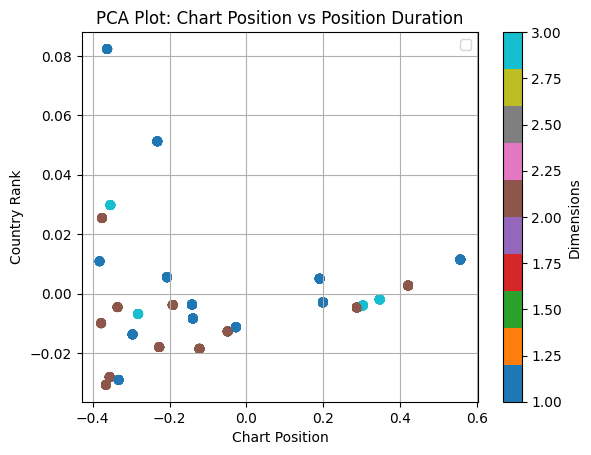

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#COMPUTE PCA
from sklearn.decomposition import PCA
n_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=n_components)
# pca.fit(X)
X1=pca.fit_transform(X)

#2D PLOT; for Chart Position and Country Rank
# 2D PLOT; for (x?) and Points
#2D PLOT; for Chart Position and Position Duration

ax = plt.scatter(X1[:,0], X1[:,1], c=Y, cmap='tab10')
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Country Rank")
plt.colorbar(ax, label="Dimensions")
plt.legend()  
plt.grid(True)
plt.show()

### t-SNE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RESULTS
shape :  (836, 3)
First few points : 
 [[ 6.175029   8.508618  -7.4983315]
 [ 8.387154   3.5311518 13.786998 ]]


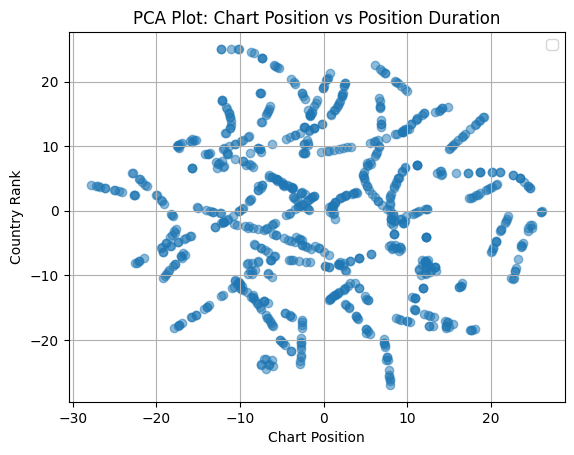

In [7]:
import numpy as np
from sklearn.manifold import TSNE

# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=5).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Country Rank")
plt.legend()  
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RESULTS
shape :  (836, 3)
First few points : 
 [[ 3.7008498 -4.7721825 14.357299 ]
 [14.687176  -8.408725   6.7310157]]


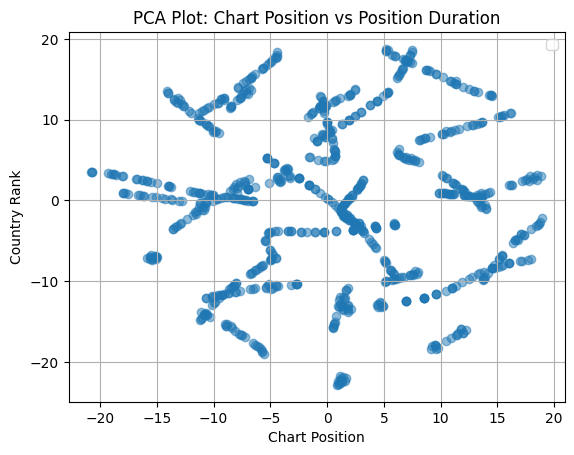

In [8]:
# DIFFERENT PERPLEXITY
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=10).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Country Rank")
plt.legend()  
plt.grid(True)
plt.show()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RESULTS
shape :  (836, 3)
First few points : 
 [[-10.657185   -3.6224663  -1.5625678]
 [  1.7244056 -20.046017   -4.3512034]]


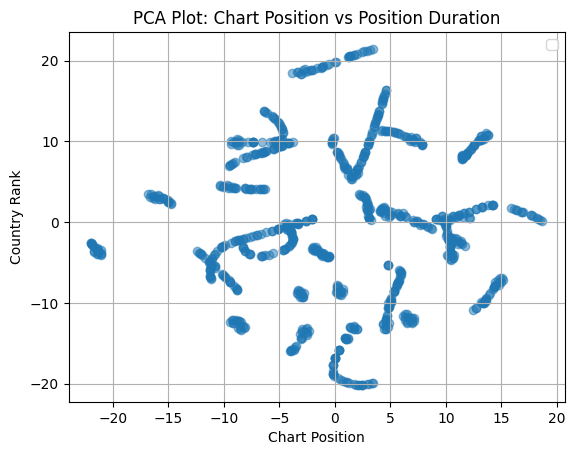

In [9]:
# DIFFERENT PERPLEXITY
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=15).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.title("PCA Plot: Chart Position vs Position Duration")
plt.xlabel("Chart Position")
plt.ylabel("Country Rank")
plt.legend()  
plt.grid(True)
plt.show()
plt.show()

When observing the Principal Component Analysis, it seems there is more variance as the songs have lower (numbers increase for rankings) Country Rank and Chart Position.
For t- SNE, it appears the clusters became noticeably distinct as the perplexity reached 15. This might indicate the Apple Music dataset contains pretty distinct clusters in general.
